In [50]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import matplotlib.pyplot as plt  # 画图模块
import scipy.stats as stats # 统计模块
import scipy
from datetime import datetime # 时间模块
from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
import statsmodels.formula.api as smf  # OLS regression

#输出矢量图 渲染矢量图 是一个魔法函数（Magic Functions）内嵌绘图
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'

#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [51]:
data = pd.read_csv('C:/Users/hp/Desktop/Python/Python-5/000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'],axis=0, ascending=True)

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.05,99.98,95.79,99.98,126000,4.940000e+05
1990-12-20,99.98,104.30,104.39,99.98,104.39,19700,8.400000e+04
1990-12-21,104.39,109.07,109.13,103.73,109.13,2800,1.600000e+04
1990-12-24,109.13,113.57,114.55,109.13,114.55,3200,3.100000e+04
1990-12-25,114.55,120.09,120.25,114.55,120.25,1500,6.000000e+03
...,...,...,...,...,...,...,...
2022-07-25,3269.97,3269.71,3273.18,3243.03,3250.39,27124574400,3.480000e+11
2022-07-26,3250.39,3254.19,3282.41,3246.04,3277.44,25946867600,3.340000e+11
2022-07-27,3277.44,3271.78,3282.57,3265.73,3275.76,24913148500,3.400000e+11


In [52]:
daily_data = data['1995-01':'2022-07'].copy()
daily_data['Close'] = pd.to_numeric(daily_data['Close'])
daily_data['Preclose'] = pd.to_numeric(daily_data['Preclose'])
# 计算000001上证指数日收益率 两种：
daily_data['Raw_return'] = daily_data['Close'] / daily_data['Preclose'] - 1
daily_data['Log_return'] = np.log(daily_data['Close']) - np.log(daily_data['Preclose'])
daily_data

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return,Log_return
Day,,,,,,,,,
1995-01-03,647.87,637.72,647.71,630.53,639.88,23451800,1.806930e+08,-0.012333,-0.012409
1995-01-04,639.88,641.90,655.51,638.86,653.81,42222000,3.069230e+08,0.021770,0.021536
1995-01-05,653.81,655.38,657.52,645.81,646.89,43012300,3.015330e+08,-0.010584,-0.010641
1995-01-06,646.89,642.75,643.89,636.33,640.76,48748200,3.537580e+08,-0.009476,-0.009521
1995-01-09,640.76,637.52,637.55,625.04,626.00,50985100,3.985190e+08,-0.023035,-0.023305
...,...,...,...,...,...,...,...,...,...
2022-07-25,3269.97,3269.71,3273.18,3243.03,3250.39,27124574400,3.480000e+11,-0.005988,-0.006006
2022-07-26,3250.39,3254.19,3282.41,3246.04,3277.44,25946867600,3.340000e+11,0.008322,0.008288
2022-07-27,3277.44,3271.78,3282.57,3265.73,3275.76,24913148500,3.400000e+11,-0.000513,-0.000513


In [53]:
Month_data = daily_data.resample('m')['Log_return'].sum().to_frame()
Month_data['Raw_return'] = np.exp(Month_data['Log_return']) - 1
Month_data.reset_index(inplace=True)
Month_data.rename(columns={'Day':'month'},inplace=True)
Month_data.set_index('month',inplace=True)
Month_data

,Log_return,Raw_return
month,,
1995-01-31,-0.141139,-0.131631
1995-02-28,-0.023979,-0.023694
1995-03-31,0.163651,0.177803
1995-04-30,-0.109315,-0.103552
1995-05-31,0.188901,0.207922
...,...,...
2022-03-31,-0.062604,-0.060685
2022-04-30,-0.065154,-0.063077
2022-05-31,0.044724,0.045739


In [54]:
Quarter_data = daily_data.resample('Q')['Log_return'].sum().to_frame()
Quarter_data['Raw_return'] = np.exp(Quarter_data['Log_return']) - 1
Quarter_data

,Log_return,Raw_return
Day,,
1995-03-31,-0.001467,-0.001466
1995-06-30,-0.025583,-0.025258
1995-09-30,0.135980,0.145660
1995-12-31,-0.263130,-0.231358
1996-03-31,0.001979,0.001981
...,...,...
2021-09-30,-0.006434,-0.006413
2021-12-31,0.019870,0.020069
2022-03-31,-0.112592,-0.106484


In [55]:
Year_data = daily_data.resample('Y')['Log_return'].sum().to_frame()
Year_data['Raw_return'] = np.exp(Year_data['Log_return']) - 1
Year_data

,Log_return,Raw_return
Day,,
1995-12-31,-0.154200,-0.142899
1996-12-31,0.501639,0.651425
1997-12-31,0.264019,0.302153
1998-12-31,-0.040505,-0.039695
1999-12-31,0.175423,0.191750
2000-12-31,0.416917,0.517277
2001-12-31,-0.230898,-0.206180
2002-12-31,-0.192575,-0.175167
2003-12-31,0.097735,0.102670


In [56]:
inflation = pd.read_csv('C:/Users/hp/Desktop/Python/Python-5/inflation.csv')
inflation['month'] = pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month',inplace=True)
inflation.sort_values(by=['month'],axis=0,ascending=True)

,cpi
month,
1987-01-31,5.1000
1987-02-28,5.4000
1987-03-31,5.8000
1987-04-30,6.7000
1987-05-31,7.6000
...,...
2022-04-30,2.1304
2022-05-31,2.1000
2022-06-30,2.5000


# 月度数据的预测

A simple linear regression of an asset return on one or a few lagged predictors of interest is the most popular econometric approach for testing for return predictability. For simplicity, consider a univariate predictive regression of the period- $(t + 1)$ stock market return $r_{t+1}$ on a single predictor variable $x_t$:
$$
r_{t+1}=\alpha+\beta x_{t}+\varepsilon_{t+1}
$$
where $\varepsilon_{t+1}$ is a zero-mean, unpredictable disturbance term. When $x_t$ is the inflation rate, dividend yield, book-to-price ratio, or turnover. Many researchers find that $\beta$ is significantly different from zero; that is, there is in-sample evidence of stock market return predictability.

* H0:$\beta = 0$
* H1:$\beta \ne 0$(我们需要通过理论分析，得出$\beta$的符号)

## ICAPM 模型的简化版

$$
r_{t} = \gamma E_{t-1}(\sigma^2_{t})
$$

$$
r_{t} = \gamma E_{t-1}(cov(r,\Delta c))
$$

$\gamma$就是相对风险厌恶系数。
这里涉及到一个概念就是 **股权溢价之谜**

In [57]:
market_variance = daily_data.resample('M').apply({
    'Raw_return':
    lambda x: sum(x**2)
})
market_variance.reset_index(inplace=True)
market_variance.rename(columns={'Day':'month','Raw_return':'MV'},inplace=True)
market_variance.set_index('month',inplace=True)
market_variance

# market_variance <- daily_data[,.(MV = sum(Raw_return^2)),by = 'month']

,MV
month,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2022-03-31,0.006740
2022-04-30,0.006234
2022-05-31,0.002035


In [58]:
reg_data = pd.merge(Month_data,market_variance,on = 'month')
reg_data = pd.merge(reg_data,inflation,on = 'month')
reg_data

,Log_return,Raw_return,MV,cpi
month,,,,
1995-01-31,-0.141139,-0.131631,0.005695,24.1000
1995-02-28,-0.023979,-0.023694,0.018086,22.4000
1995-03-31,0.163651,0.177803,0.013378,21.3000
1995-04-30,-0.109315,-0.103552,0.008281,20.7000
1995-05-31,0.188901,0.207922,0.148387,20.3000
...,...,...,...,...
2022-03-31,-0.062604,-0.060685,0.006740,1.5000
2022-04-30,-0.065154,-0.063077,0.006234,2.1304
2022-05-31,0.044724,0.045739,0.002035,2.1000


## 作图 Plot

CPU times: total: 156 ms
Wall time: 162 ms


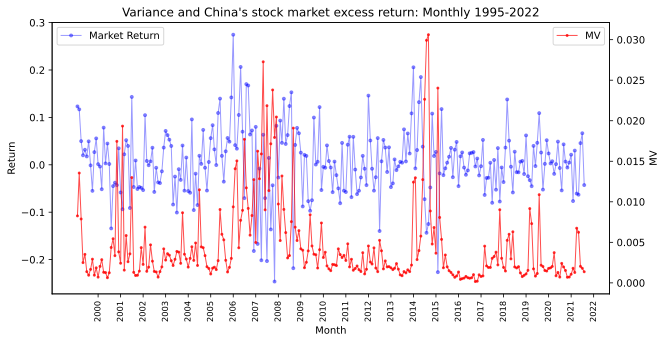

In [59]:
%%time
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(reg_data['2000-01':'2022-07']['Raw_return'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Market Return')
ax1.set_xlabel('Month')  # 设置横坐标标签
ax1.set_ylabel('Return')  # 设置左边纵坐标标签
ax1.legend(loc=2)  # 设置图例在左上方
ax1.set_title("Variance and China's stock market excess return: Monthly 1995-2022")  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(reg_data['2000-01':'2022-07']['MV'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='MV')
ax2.set_ylabel('MV')  # 设置右边纵坐标标签
ax2.legend(loc=1)  # 设置图例在右上方

year_freq = pd.date_range(start='2000', end='2023', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

fig = plt.gcf()
fig.savefig('MV.pdf', bbox_inches='tight')

## 描述性统计 Summary


In [60]:
reg_data['MV'].describe().round(5)

count    331.00000
mean       0.00578
std        0.01001
min        0.00016
25%        0.00172
50%        0.00295
75%        0.00659
max        0.14839
Name: MV, dtype: float64

In [61]:
reg_data['MV'].skew()
reg_data['MV'].kurt()

9.468234946729003

126.33050495806405

## OLS 回归结果

In [62]:
reg_data['lMV'] = reg_data['MV'].shift(1)
model_cpi = smf.ols('Raw_return ~ lMV',
                 data=reg_data['2000-01':'2022-07']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.496
Date:                Mon, 14 Nov 2022   Prob (F-statistic):              0.222
Time:                        21:37:33   Log-Likelihood:                 328.65
No. Observations:                 271   AIC:                            -653.3
Df Residuals:                     269   BIC:                            -646.1
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0124      0.007      1.902      0.0

In [63]:
reg_data['lcpi'] = reg_data['cpi'].shift(2)
model_twovariables = smf.ols('Raw_return ~ lMV + lcpi',
                 data=reg_data['2000-01':'2022-07']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_twovariables.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     6.145
Date:                Mon, 14 Nov 2022   Prob (F-statistic):            0.00246
Time:                        21:37:33   Log-Likelihood:                 334.20
No. Observations:                 271   AIC:                            -662.4
Df Residuals:                     268   BIC:                            -651.6
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0259      0.008      3.131      0.0

## 季度结果

In [64]:
Q_reg_data = reg_data['1995-01':'2021-06'].resample('Q').apply({
    'Raw_return':
    lambda x: np.exp(np.log(1 + x).sum()) - 1,
    'MV':
    np.sum
})
Q_reg_data

,Raw_return,MV
month,,
1995-03-31,-0.001466,0.037159
1995-06-30,-0.025258,0.165852
1995-09-30,0.145660,0.022866
1995-12-31,-0.231358,0.014829
1996-03-31,0.001981,0.021250
...,...,...
2020-06-30,0.085216,0.003706
2020-09-30,0.078193,0.015060
2020-12-31,0.079247,0.004756


CPU times: total: 594 ms
Wall time: 160 ms


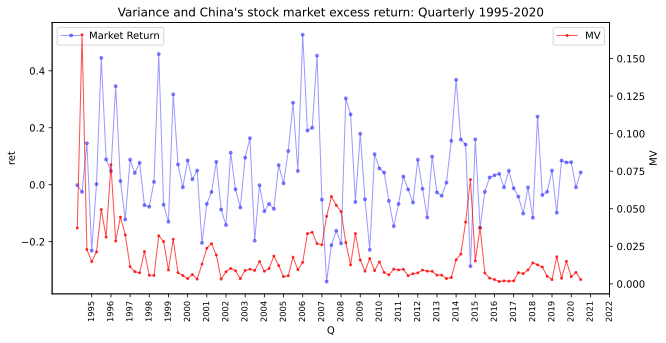

In [65]:
%%time
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(Q_reg_data['Raw_return'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Market Return')
ax1.set_xlabel('Q')  # 设置横坐标标签
ax1.set_ylabel('ret')  # 设置左边纵坐标标签
ax1.legend(loc=2)  # 设置图例在左上方
ax1.set_title("Variance and China's stock market excess return: Quarterly 1995-2020")  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(Q_reg_data['MV'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='MV')
ax2.set_ylabel('MV')  # 设置右边纵坐标标签
ax2.legend(loc=1)  # 设置图例在右上方

year_freq = pd.date_range(start='1995', end='2023', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

fig = plt.gcf()
fig.savefig('QMV.pdf', bbox_inches='tight')

In [66]:
Q_reg_data['lMV'] = Q_reg_data['MV'].shift(1)
model_qcpi = smf.ols('Raw_return ~ lMV',
                 data=Q_reg_data['2000-01':'2022-06']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_qcpi.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                 9.569e-05
Date:                Mon, 14 Nov 2022   Prob (F-statistic):              0.992
Time:                        21:37:34   Log-Likelihood:                 40.757
No. Observations:                  86   AIC:                            -77.51
Df Residuals:                      84   BIC:                            -72.61
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0219      0.024      0.914      0.3

## 长期预测 Long Horizon Forecast

$$
r_{t+1} + r_{t+2} + r_{t+3}  =\alpha+\beta x_{t}+\varepsilon_{t+1}
$$

In [67]:
reg_data['next_ret'] = reg_data['Raw_return'].shift(-1) + 1
reg_data['next_ret2'] = reg_data['Raw_return'].shift(-2) + 1
reg_data['next_ret3'] = reg_data['Raw_return'].shift(-3) + 1
reg_data['future_3month_return'] = reg_data['next_ret'] * reg_data['next_ret2'] * reg_data['next_ret3'] - 1
reg_data

,Log_return,Raw_return,MV,cpi,lMV,lcpi,next_ret,next_ret2,next_ret3,future_3month_return
month,,,,,,,,,,
1995-01-31,-0.141139,-0.131631,0.005695,24.1000,NaN,NaN,0.976306,1.177803,0.896448,0.030822
1995-02-28,-0.023979,-0.023694,0.018086,22.4000,0.005695,NaN,1.177803,0.896448,1.207922,0.275370
1995-03-31,0.163651,0.177803,0.013378,21.3000,0.018086,24.1000,0.896448,1.207922,0.900173,-0.025258
1995-04-30,-0.109315,-0.103552,0.008281,20.7000,0.013378,22.4000,1.207922,0.900173,1.103032,0.199369
1995-05-31,0.188901,0.207922,0.148387,20.3000,0.008281,21.3000,0.900173,1.103032,1.040716,0.033347
...,...,...,...,...,...,...,...,...,...,...
2022-03-31,-0.062604,-0.060685,0.006740,1.5000,0.001278,0.9000,0.936923,1.045739,1.066592,0.045022
2022-04-30,-0.065154,-0.063077,0.006234,2.1304,0.006740,0.9000,1.045739,1.066592,0.957224,0.067665
2022-05-31,0.044724,0.045739,0.002035,2.1000,0.006234,1.5000,1.066592,0.957224,NaN,NaN


In [68]:
model_cpi_3month = smf.ols('future_3month_return ~ lMV',
                 data=reg_data['2000-01':'2022-06']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi_3month.summary())

                             OLS Regression Results                             
Dep. Variable:     future_3month_return   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.003
Method:                   Least Squares   F-statistic:                   0.02194
Date:                  Mon, 14 Nov 2022   Prob (F-statistic):              0.882
Time:                          21:37:34   Log-Likelihood:                 139.94
No. Observations:                   268   AIC:                            -275.9
Df Residuals:                       266   BIC:                            -268.7
Df Model:                             1                                         
Covariance Type:                    HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0149      0.017

# 预测波动率

这里的结果显示出波动率具有非常高的自相关性，类比前一次课的通货膨胀。

In [69]:
model_mv = smf.ols('MV ~ lMV + lcpi',
                 data=reg_data['2000-01':'2022-07']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_mv.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     28.53
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           5.84e-12
Time:                        21:37:34   Log-Likelihood:                 1099.6
No. Observations:                 271   AIC:                            -2193.
Df Residuals:                     268   BIC:                            -2182.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0014      0.000      2.961      0.0

## 换手率

In [70]:
cross = pd.read_csv('C:/Users/hp/Desktop/Python/Python-5/cross_section.csv')
cross['month'] = pd.to_datetime(cross['month'],format='%Y-%m-%d')
cross['to_v'] = pd.to_numeric(cross['to_v'])
cross['floatingvalue'] = pd.to_numeric(cross['floatingvalue'])
cross = cross.dropna(subset=['to_v','floatingvalue'])
cross

,Stkcd,month,floatingvalue,totalvalue,Return,rfmonth,Rank,Freq,ret,next_ret,sizef,sizet,ew,Clsprc,beta_6m,N6m,beta_12m,N12m,bm,am,ep,to_v,fv,max1
0,1,1991-05-01,1.016010e+09,1.859497e+09,-0.122253,0.006092,2,24,-0.128345,-0.119551,20.739149,21.343572,1,38.34,4.192309,44.0,4.192309,44.0,NaN,NaN,NaN,0.007087,0.000804,-0.004883
1,1,1991-06-01,9.007350e+08,1.648521e+09,-0.113459,0.006092,3,23,-0.119551,-0.137013,20.618722,21.223144,1,33.99,0.246808,67.0,0.246808,67.0,NaN,NaN,NaN,0.001155,0.000895,0.004956
2,1,1991-07-01,7.828100e+08,1.432695e+09,-0.130921,0.006092,4,16,-0.137013,-0.417680,20.478401,21.082823,1,29.54,0.165424,83.0,0.165424,83.0,NaN,NaN,NaN,0.000230,0.001596,-0.004853
3,1,1991-08-01,6.748338e+08,1.346275e+09,-0.411588,0.006092,5,15,-0.417680,-0.039425,20.329977,21.020607,1,15.00,1.506699,98.0,1.506699,98.0,NaN,NaN,NaN,0.072087,0.240913,0.152896
4,1,1991-09-01,6.523394e+08,1.301399e+09,-0.033333,0.006092,6,24,-0.039425,0.849080,20.296075,20.986706,1,14.50,1.502630,122.0,1.502630,122.0,NaN,NaN,NaN,0.160940,0.005872,0.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604791,605598,2021-11-01,6.332162e+08,2.532419e+09,0.077941,0.001241,3,22,0.076700,0.085389,20.266323,21.652441,1,14.66,1.053620,45.0,1.053620,45.0,0.567844,0.701310,NaN,1.263335,0.005363,0.031528
604792,605598,2021-12-01,6.880719e+08,2.751803e+09,0.086630,0.001241,4,23,0.085389,NaN,20.349404,21.735522,1,15.93,0.524152,68.0,0.524152,68.0,0.522574,0.645399,NaN,3.586361,0.030537,0.100275
604793,605599,2021-10-01,9.076669e+08,9.076667e+09,-0.080378,0.001241,2,16,-0.081619,0.060456,20.626388,22.928973,1,11.67,1.339638,29.0,1.339638,29.0,0.342676,0.529242,NaN,0.970121,0.009502,0.034691
604794,605599,2021-11-01,9.636669e+08,9.636667e+09,0.061697,0.001241,3,22,0.060456,0.085119,20.686256,22.988841,1,12.39,1.018228,51.0,1.018228,51.0,0.322763,0.498487,NaN,0.924082,0.003929,0.026556


In [71]:
turnover = pd.DataFrame(cross.groupby(['month']).apply(
    lambda x:
    np.average(x['to_v'],weights=x['floatingvalue']) 
))
turnover = turnover.rename(columns={0:'to'})
turnover['month']  = pd.date_range(start='1991', end='2022', freq='m')
turnover.set_index('month',inplace=True)
turnover

,to
month,
1991-01-31,0.052992
1991-02-28,0.038486
1991-03-31,0.014105
1991-04-30,0.026301
1991-05-31,0.034965
...,...
2021-08-31,0.419196
2021-09-30,0.365827
2021-10-31,0.226223


In [72]:
reg_data = pd.merge(reg_data,turnover,on='month')
reg_data

,Log_return,Raw_return,MV,cpi,lMV,lcpi,next_ret,next_ret2,next_ret3,future_3month_return,to
month,,,,,,,,,,,
1995-01-31,-0.141139,-0.131631,0.005695,24.1,NaN,NaN,0.976306,1.177803,0.896448,0.030822,0.095181
1995-02-28,-0.023979,-0.023694,0.018086,22.4,0.005695,NaN,1.177803,0.896448,1.207922,0.275370,0.092256
1995-03-31,0.163651,0.177803,0.013378,21.3,0.018086,24.1,0.896448,1.207922,0.900173,-0.025258,0.394592
1995-04-30,-0.109315,-0.103552,0.008281,20.7,0.013378,22.4,1.207922,0.900173,1.103032,0.199369,0.314511
1995-05-31,0.188901,0.207922,0.148387,20.3,0.008281,21.3,0.900173,1.103032,1.040716,0.033347,0.721726
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,0.042240,0.043145,0.001956,0.8,0.002401,1.1,1.006837,0.994162,1.004665,0.005629,0.419196
2021-09-30,0.006814,0.006837,0.001526,0.7,0.001956,1.0,0.994162,1.004665,1.021294,0.020069,0.365827
2021-10-31,-0.005855,-0.005838,0.000690,1.5,0.001526,0.8,1.004665,1.021294,0.923528,-0.052405,0.226223


CPU times: total: 125 ms
Wall time: 127 ms


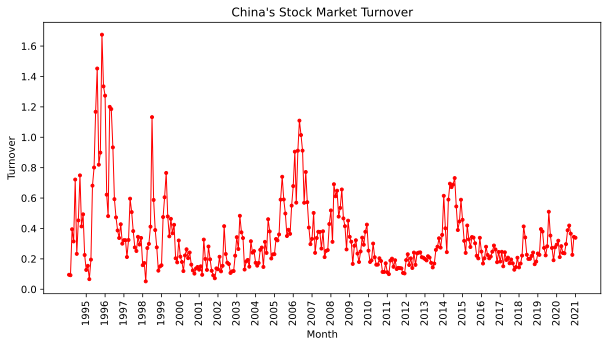

In [73]:
%%time
fig = plt.figure(figsize=(10, 5)) # 图片比例
plt.plot(
    'to',  # 要画图的变量名
    '.-r',  # 线的类型
    linewidth = 1,  # 线的粗细
    data = reg_data['1995-01-01':'2021-12-31'])  # 画图的数据
plt.title("China's Stock Market Turnover") # 画图的标题
plt.xlabel('Month') # 画图的x轴名称
plt.ylabel('Turnover') # 画图的y轴名称

year_freq = pd.date_range(start='1995', end='2022', freq='y')
c = plt.xticks(year_freq, year_freq.year, rotation=90, fontsize=10)

fig.savefig('turnover.pdf', bbox_inches='tight')

CPU times: total: 188 ms
Wall time: 193 ms


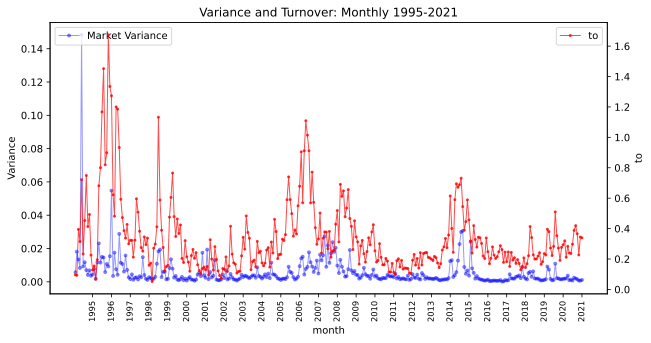

In [74]:
%%time
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(reg_data['MV'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Market Variance')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('Variance')  # 设置左边纵坐标标签
ax1.legend(loc=2)  # 设置图例在左上方
ax1.set_title("Variance and Turnover: Monthly 1995-2021")  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(reg_data['to'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='to')
ax2.set_ylabel('to')  # 设置右边纵坐标标签
ax2.legend(loc=1)  # 设置图例在右上方

year_freq = pd.date_range(start='1995', end='2022', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

fig = plt.gcf()
fig.savefig('mvto.pdf', bbox_inches='tight')

In [75]:
reg_data['lto'] = reg_data['to'].shift(1)
model_fore_mv = smf.ols('MV ~ lto',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_mv.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     17.67
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           3.61e-05
Time:                        21:37:36   Log-Likelihood:                 1033.5
No. Observations:                 264   AIC:                            -2063.
Df Residuals:                     262   BIC:                            -2056.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0008      0.001      0.912      0.3

In [76]:
model_fore_mv = smf.ols('MV ~ lto + lMV',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_mv.summary())

                            OLS Regression Results                            
Dep. Variable:                     MV   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     29.75
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           2.29e-12
Time:                        21:37:36   Log-Likelihood:                 1072.9
No. Observations:                 264   AIC:                            -2140.
Df Residuals:                     261   BIC:                            -2129.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.001      0.932      0.3

In [77]:
reg_data['fitted_mv'] = model_fore_mv.fittedvalues
reg_data

,Log_return,Raw_return,MV,cpi,lMV,lcpi,next_ret,next_ret2,next_ret3,future_3month_return,to,lto,fitted_mv
month,,,,,,,,,,,,,
1995-01-31,-0.141139,-0.131631,0.005695,24.1,NaN,NaN,0.976306,1.177803,0.896448,0.030822,0.095181,NaN,NaN
1995-02-28,-0.023979,-0.023694,0.018086,22.4,0.005695,NaN,1.177803,0.896448,1.207922,0.275370,0.092256,0.095181,NaN
1995-03-31,0.163651,0.177803,0.013378,21.3,0.018086,24.1,0.896448,1.207922,0.900173,-0.025258,0.394592,0.092256,NaN
1995-04-30,-0.109315,-0.103552,0.008281,20.7,0.013378,22.4,1.207922,0.900173,1.103032,0.199369,0.314511,0.394592,NaN
1995-05-31,0.188901,0.207922,0.148387,20.3,0.008281,21.3,0.900173,1.103032,1.040716,0.033347,0.721726,0.314511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,0.042240,0.043145,0.001956,0.8,0.002401,1.1,1.006837,0.994162,1.004665,0.005629,0.419196,0.387907,0.004001
2021-09-30,0.006814,0.006837,0.001526,0.7,0.001956,1.0,0.994162,1.004665,1.021294,0.020069,0.365827,0.419196,0.003952
2021-10-31,-0.005855,-0.005838,0.000690,1.5,0.001526,0.8,1.004665,1.021294,0.923528,-0.052405,0.226223,0.365827,0.003423


In [78]:
model_fore_ret = smf.ols('Raw_return ~ fitted_mv',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_ret.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1612
Date:                Mon, 14 Nov 2022   Prob (F-statistic):              0.688
Time:                        21:37:36   Log-Likelihood:                 317.80
No. Observations:                 264   AIC:                            -631.6
Df Residuals:                     262   BIC:                            -624.5
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0106      0.009      1.122      0.2